# Model C: Excludes Income

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from df_after_transform import df_after_transform
from sklearn import set_config
from sklearn.calibration import CalibrationDisplay
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
    make_column_transformer,
)
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.feature_selection import (
    RFECV,
    SelectFromModel,
    SelectKBest,
    SequentialFeatureSelector,
    f_classif,
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    DetCurveDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay,
    classification_report,
    make_scorer,
    r2_score
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from sklearn.svm import LinearSVC

set_config(display="diagram")  # display='text' is the default

pd.set_option(
    "display.max_colwidth", 1000, "display.max_rows", 50, "display.max_columns", None
)

import warnings

warnings.filterwarnings("ignore")

In [2]:
set_config(display="diagram")
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', 50, 'display.max_columns', None) 

mortgage = pd.read_csv('Input/mortgage_train.csv')

In [3]:

mortgage.drop(columns=["applicant_income_000s"], axis = 1, inplace=True)

In [4]:
perc = 94.6 # Like N %
min_count =  int(((100-perc)/100)*mortgage.shape[0] + 1)
mortgage = mortgage.dropna( axis=1, 
                thresh=min_count)

In [5]:
mortgage

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,co_applicant_race_name_1,co_applicant_race_1,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,hoepa_status_name,hoepa_status,lien_status_name,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,53,Not applicable,3,Application withdrawn by applicant,4,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,101.0,173.00,Not Hispanic or Latino,2,No co-applicant,5,Black or African American,3,No co-applicant,8,Male,1,No co-applicant,5,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,3202.0,97.279999,57400.0,47.540001,710.0,1314.0
1,2017,43-1965151,Department of Housing and Urban Development,HUD,7,VA-guaranteed,3,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,107,Not applicable,3,Application denied by financial institution,3,"Scranton, Wilkes-Barre, Hazleton - PA",42540.0,Pennsylvania,PA,42,Luzerne County,79.0,2173.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,No co-applicant,8,Male,1,No co-applicant,5,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,3382.0,20.280001,59500.0,93.230003,1016.0,1389.0
2,2017,86-0860478,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufactured housing),1,Home purchase,1,Owner-occupied as a principal dwelling,1,60,Not applicable,3,Application withdrawn by applicant,4,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,101.0,55.00,Not Hispanic or Latino,2,No co-applicant,5,Black or African American,3,No co-applicant,8,Female,2,No co-applicant,5,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,6385.0,90.599998,57400.0,101.790001,1595.0,2475.0
3,2017,451965,Consumer Financial Protection Bureau,CFPB,9,FHA-insured,2,One-to-four family dwelling (other than manufactured housing),1,Home purchase,1,Owner-occupied as a principal dwelling,1,196,Not applicable,3,Loan originated,1,"Montgomery County, Bucks County, Chester County - PA",33874.0,Pennsylvania,PA,42,Montgomery County,91.0,2036.02,Not Hispanic or Latino,2,No co-applicant,5,White,5,No co-applicant,8,Male,1,No co-applicant,5,Ginnie Mae (GNMA),2,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,4078.0,58.310001,102600.0,73.889999,1021.0,1463.0
4,2017,36-4327855,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Home purchase,1,Owner-occupied as a principal dwelling,1,416,Preapproval was not requested,2,Loan originated,1,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,101.0,160.00,Not Hispanic or Latino,2,"Information not provided by applicant in mail, Internet, or telephone application",3,White,5,"Information not provided by applicant in mail, Internet, or telephone application",6,Female,2,"Information not provided by applicant in mail, Internet, or telephone application",3,"Life insuranc

In [6]:
mortgage = mortgage[(mortgage.action_taken == 2) | (mortgage.action_taken == 3)]

In [7]:
#mortgage[(mortgage.action_taken != 1) & (mortgage.action_taken != 4) & (mortgage.action_taken != 4) & (mortgage.action_taken != 4)]

In [8]:
#mortgage.info()

In [9]:
mortgage

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,co_applicant_race_name_1,co_applicant_race_1,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,hoepa_status_name,hoepa_status,lien_status_name,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
1,2017,43-1965151,Department of Housing and Urban Development,HUD,7,VA-guaranteed,3,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,107,Not applicable,3,Application denied by financial institution,3,"Scranton, Wilkes-Barre, Hazleton - PA",42540.0,Pennsylvania,PA,42,Luzerne County,79.0,2173.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,No co-applicant,8,Male,1,No co-applicant,5,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,3382.0,20.280001,59500.0,93.230003,1016.0,1389.0
6,2017,480228,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Not owner-occupied as a principal dwelling,2,70,Not applicable,3,Application denied by financial institution,3,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,101.0,173.00,"Information not provided by applicant in mail, Internet, or telephone application",3,No co-applicant,5,"Information not provided by applicant in mail, Internet, or telephone application",6,No co-applicant,8,"Information not provided by applicant in mail, Internet, or telephone application",3,No co-applicant,5,Loan was not originated or was not sold in calendar year covered by register,0,Debt-to-income ratio,1.0,Not a HOEPA loan,2,Secured by a first lien,1,3202.0,97.279999,57400.0,47.540001,710.0,1314.0
12,2017,817824,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Home improvement,2,Owner-occupied as a principal dwelling,1,18,Not applicable,3,Application denied by financial institution,3,Pittsburgh - PA,38300.0,Pennsylvania,PA,42,Westmoreland County,129.0,8058.00,Not Hispanic or Latino,2,Not Hispanic or Latino,2,White,5,Black or African American,3,Female,2,Female,2,Loan was not originated or was not sold in calendar year covered by register,0,Credit history,3.0,Not a HOEPA loan,2,Not secured by a lien,3,2986.0,6.900000,72200.0,81.120003,1049.0,1446.0
14,2017,7197000003,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,101,Not applicable,3,Application denied by financial institution,3,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,101.0,55.00,Not Hispanic or Latino,2,Not Hispanic or Latino,2,Black or African American,3,Black or African American,3,Male,1,Female,2,Loan was not originated or was not sold in calendar year covered by register,0,Collateral,4.0,Not a HOEPA loan,2,Secured by a first lien,1,6385.0,90.599998,57400.0,101.790001,1595.0,2475.0
16,2017,675332,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Home improvement,2,Not owner-occupied as a principal dwelling,2,5,Not applicable,3,Application denied by financial institution,3,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,101.0,

In [10]:
#mortgage.loc[mortgage['action_taken'] == 3] # Application approved but not accepted

In [11]:
y = mortgage.action_taken== 3
y.value_counts()
mortgage = mortgage.drop("action_taken", axis=1)

# stratify will make sure that test/train both have equal fractions of outcome
X_train, X_test, y_train, y_test = train_test_split(mortgage, y, stratify=y, test_size=0.2, random_state=0
)

In [12]:
numer_pipe = make_pipeline(SimpleImputer(),StandardScaler()) 

cat_pipe = make_pipeline(OneHotEncoder())


preproc_pipe = ColumnTransformer([("num_impute", numer_pipe, make_column_selector(dtype_include=np.number)),
                                  ("cat_trans", cat_pipe, ['loan_purpose_name'])],remainder = 'drop')

clf_logit = make_pipeline(preproc_pipe, LogisticRegression())

In [13]:
clf_logit.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_impute',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd46271f370>),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['loan_purpose_name'])])),
                ('logisticregression', LogisticRegression())])

In [14]:
print(classification_report(y_train, 
                            clf_logit.predict(X_train)))

              precision    recall  f1-score   support

       False       1.00      0.00      0.01       267
        True       0.90      1.00      0.95      2296

    accuracy                           0.90      2563
   macro avg       0.95      0.50      0.48      2563
weighted avg       0.91      0.90      0.85      2563



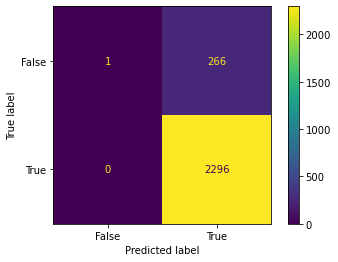

In [15]:
ConfusionMatrixDisplay.from_estimator(clf_logit, X_train, y_train)

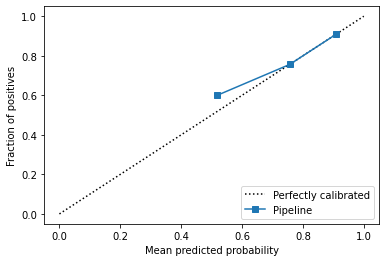

In [16]:
CalibrationDisplay.from_estimator(clf_logit, X_train, y_train)

In [17]:
logit_pred_test = pd.DataFrame({'Respondent_ID': X_test['respondent_id'], 'Prediction': clf_logit.predict(X_test)})
logit_pred_test


,Respondent_ID,Prediction
1488,66158,True
3495,705537,True
2022,26-4599244,True
2532,22-3747694,True
4749,1768800000,True
...,...,...
6481,817824,True
8576,280110,True
9943,47-0912342,True
9462,36-4771976,True


In [18]:
logit_pred_test.to_csv('pred/testex1.csv', index=False)

In [19]:
bigmort = pd.read_csv('Input/mortgage_holdout.csv')

In [20]:

bigmort.drop(columns=["census_tract_number","applicant_ethnicity","co_applicant_ethnicity","applicant_race_1",
                       "applicant_race_2","applicant_race_3","applicant_race_4"], axis = 1, inplace=True)
bigmort.drop(columns=["applicant_race_5","co_applicant_race_1","co_applicant_race_2","co_applicant_race_3",
                       "co_applicant_race_4","co_applicant_race_5","applicant_sex"], axis = 1, inplace=True)
bigmort.drop(columns=['county_code','co_applicant_sex','minority_population'], axis = 1, inplace=True)
bigmort

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,applicant_ethnicity_name,co_applicant_ethnicity_name,applicant_race_name_1,applicant_race_name_2,applicant_race_name_3,applicant_race_name_4,applicant_race_name_5,co_applicant_race_name_1,co_applicant_race_name_2,co_applicant_race_name_3,co_applicant_race_name_4,co_applicant_race_name_5,applicant_sex_name,co_applicant_sex_name,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,53,Not applicable,3,Application withdrawn by applicant,4,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,Not Hispanic or Latino,No co-applicant,Black or African American,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN,Male,No co-applicant,12.0,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,3202.0,57400.0,47.540001,710.0,1314.0,NaN
1,2017,43-1965151,Department of Housing and Urban Development,HUD,7,VA-guaranteed,3,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,107,Not applicable,3,Application denied by financial institution,3,"Scranton, Wilkes-Barre, Hazleton - PA",42540.0,Pennsylvania,PA,42,Luzerne County,Not Hispanic or Latino,No co-applicant,White,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN,Male,No co-applicant,12.0,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,3382.0,59500.0,93.230003,1016.0,1389.0,NaN
2,2017,86-0860478,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufactured housing),1,Home purchase,1,Owner-occupied as a principal dwelling,1,60,Not applicable,3,Application withdrawn by applicant,4,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,Not Hispanic or Latino,No co-applicant,Black or African American,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN,Female,No co-applicant,26.0,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,6385.0,57400.0,101.790001,1595.0,2475.0,NaN
3,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,FHA-insured,2,One-to-four family dwelling (other than manufactured housing),1,Home purchase,1,Owner-occupied as a principal dwelling,1,196,Not applicable,3,Loan originated,1,"Montgomery County, Bucks County, Chester County - PA",33874.0,Pennsylvania,PA,42,Montgomery County,Not Hispanic or Latino,No co-applicant,White,NaN,NaN,NaN,NaN,No co-applicant,NaN,NaN,NaN,NaN,Male,No co-applicant,57.0,Ginnie Mae (GNMA),2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4078.0,102600.0,73.889999,1021.0,1463.0,NaN
4,2017,36-4327855,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Home purchase,1,Owner-occupied as a principal dwelling,1,416,Preapproval was not requested,2,Loan originated,1,Philadelphia - PA,37964.0,Penn

In [21]:
perc = 94.6 # Like N %
min_count =  int(((100-perc)/100)*mortgage.shape[0] + 1)
bigmort = bigmort.dropna( axis=1, 
                thresh=min_count)

In [22]:
bigmort = bigmort[(bigmort.action_taken == 2) | (bigmort.action_taken == 3)]

In [23]:
bigmort

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,applicant_ethnicity_name,co_applicant_ethnicity_name,applicant_race_name_1,applicant_race_name_2,co_applicant_race_name_1,co_applicant_race_name_2,applicant_sex_name,co_applicant_sex_name,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
1,2017,43-1965151,Department of Housing and Urban Development,HUD,7,VA-guaranteed,3,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,107,Not applicable,3,Application denied by financial institution,3,"Scranton, Wilkes-Barre, Hazleton - PA",42540.0,Pennsylvania,PA,42,Luzerne County,Not Hispanic or Latino,No co-applicant,White,NaN,No co-applicant,NaN,Male,No co-applicant,12.0,Loan was not originated or was not sold in calendar year covered by register,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,3382.0,59500.0,93.230003,1016.0,1389.0
6,2017,0000480228,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Not owner-occupied as a principal dwelling,2,70,Not applicable,3,Application denied by financial institution,3,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,"Information not provided by applicant in mail, Internet, or telephone application",No co-applicant,"Information not provided by applicant in mail, Internet, or telephone application",NaN,No co-applicant,NaN,"Information not provided by applicant in mail, Internet, or telephone application",No co-applicant,62.0,Loan was not originated or was not sold in calendar year covered by register,0,Debt-to-income ratio,1.0,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,3202.0,57400.0,47.540001,710.0,1314.0
12,2017,0000817824,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Home improvement,2,Owner-occupied as a principal dwelling,1,18,Not applicable,3,Application denied by financial institution,3,Pittsburgh - PA,38300.0,Pennsylvania,PA,42,Westmoreland County,Not Hispanic or Latino,Not Hispanic or Latino,White,NaN,Black or African American,NaN,Female,Female,27.0,Loan was not originated or was not sold in calendar year covered by register,0,Credit history,3.0,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Not secured by a lien,3,2986.0,72200.0,81.120003,1049.0,1446.0
14,2017,7197000003,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufactured housing),1,Refinancing,3,Owner-occupied as a principal dwelling,1,101,Not applicable,3,Application denied by financial institution,3,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,Not Hispanic or Latino,Not Hispanic or Latino,Black or African American,NaN,Black or African American,NaN,Male,Female,100.0,Loan was not originated or was not sold in calendar year covered by register,0,Collateral,4.0,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,6385.0,57400.0,101.790001,1595.0,2475.0
16,2017,0000675332,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufactured housing),1,Home improvement,2,Not owner-occupied as a principal dwelling,2,5,Not applicable,3,Application denied by financial institution,3,Philadelphia - PA,37964.0,Pennsylvania,PA,42,Philadelphia County,Not Hisp

In [ ]:
#check.loc[check['Prediction_x'] != [check['Prediction_y']]]
